# Kunskapskontroll 3

## The usual imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Read the data and start analyzing

In [3]:
housing_orig = pd.read_csv("housing.csv")
housing_orig.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [5]:
housing_orig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


## Incomplete data

Total bedrooms seems incomplete. Check number of rows with null data

In [7]:
housing_orig.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

## Drop rows with null data

In [9]:
housing = housing_orig.dropna()

## Analyze again

In [11]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


## Check for duplicates

In [13]:
housing.duplicated().sum()

0

## Check some statistics

In [15]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


## **ocean_proximity**

When running _describe_ the **ocean_proximity** is not included by default. We run this instead:

In [17]:
housing.groupby("ocean_proximity")["ocean_proximity"].count()

ocean_proximity
<1H OCEAN     9034
INLAND        6496
ISLAND           5
NEAR BAY      2270
NEAR OCEAN    2628
Name: ocean_proximity, dtype: int64

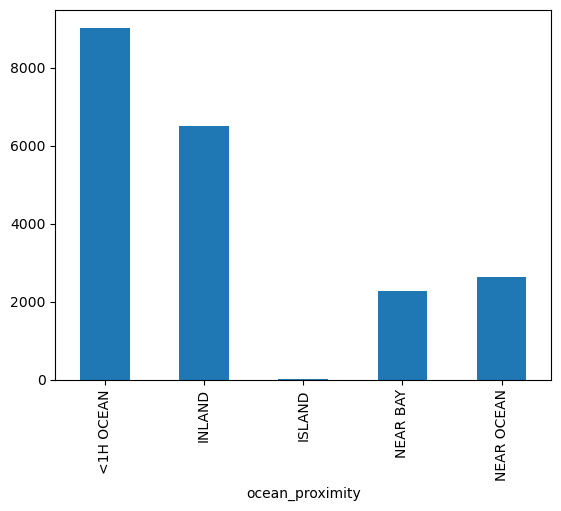

In [19]:
housing.groupby("ocean_proximity")["ocean_proximity"].count().plot(kind="bar");  # Use semicolon to avoid return value

Okay, we now know a little more about **ocean_proximity**, let's skip it for now and look for correlations between the other columns.

## Correlation table

In [21]:
housing.drop(columns="ocean_proximity").corr().style.background_gradient(cmap="Reds")

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924616,-0.109357,0.045480,0.069608,0.100270,0.056513,-0.015550,-0.045398
latitude,-0.924616,1.000000,0.011899,-0.036667,-0.066983,-0.108997,-0.071774,-0.079626,-0.144638
housing_median_age,-0.109357,0.011899,1.000000,-0.360628,-0.320451,-0.295787,-0.302768,-0.118278,0.106432
total_rooms,0.045480,-0.036667,-0.360628,1.000000,0.930380,0.857281,0.918992,0.197882,0.133294
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.100270,-0.108997,-0.295787,0.857281,0.877747,1.000000,0.907186,0.005087,-0.025300
households,0.056513,-0.071774,-0.302768,0.918992,0.979728,0.907186,1.000000,0.013434,0.064894
median_income,-0.015550,-0.079626,-0.118278,0.197882,-0.007723,0.005087,0.013434,1.000000,0.688355
median_house_value,-0.045398,-0.144638,0.106432,0.133294,0.049686,-0.025300,0.064894,0.688355,1.000000


By just looking at numbers we see a strong negative correlation between the **longitude** and the **latitude** columns, but California just happens to be shaped that way. It is important to understand the data. 
We can also see a strong correlation between **median_income** and **median_house_value** which probably won't surprise anyone.

Let's take a look at the "map". The color indicates **median_house_value** and the size of the circles indicates the **population**

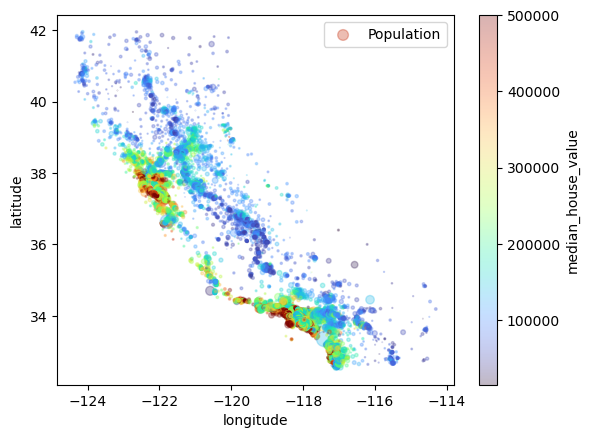

In [23]:
housing.plot(kind="scatter", x="longitude", y="latitude", s=housing["population"]/300, alpha=0.3, c="median_house_value",
            label="Population", cmap="turbo");

Back to the **ocean_proximity**. What would it look like on the "map"?

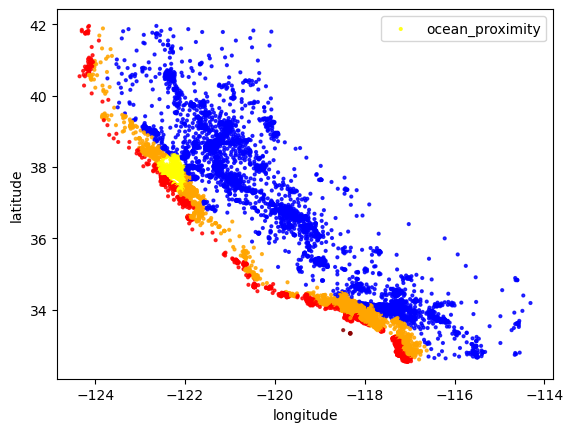

In [25]:
op_map = ({'ISLAND':'darkred','NEAR OCEAN':'red','<1H OCEAN':'orange','NEAR BAY':'yellow', 'INLAND':'blue'})
housing.plot(kind="scatter", x="longitude", y="latitude", s=4, alpha=0.8, c=housing["ocean_proximity"].map(op_map),
            label="ocean_proximity");

Next thing to fix here would be a legend for the diagram, i.e. to show the **op_map** in the diagram.

## The location of housing with unknown **total_bedrooms**

Why do we have housing with missing **total_bedrooms**? Is it more common in some areas with missing **total_bedrooms**? Lets take a look again on housing with unknown **total_bedrooms**. Where are they located? 

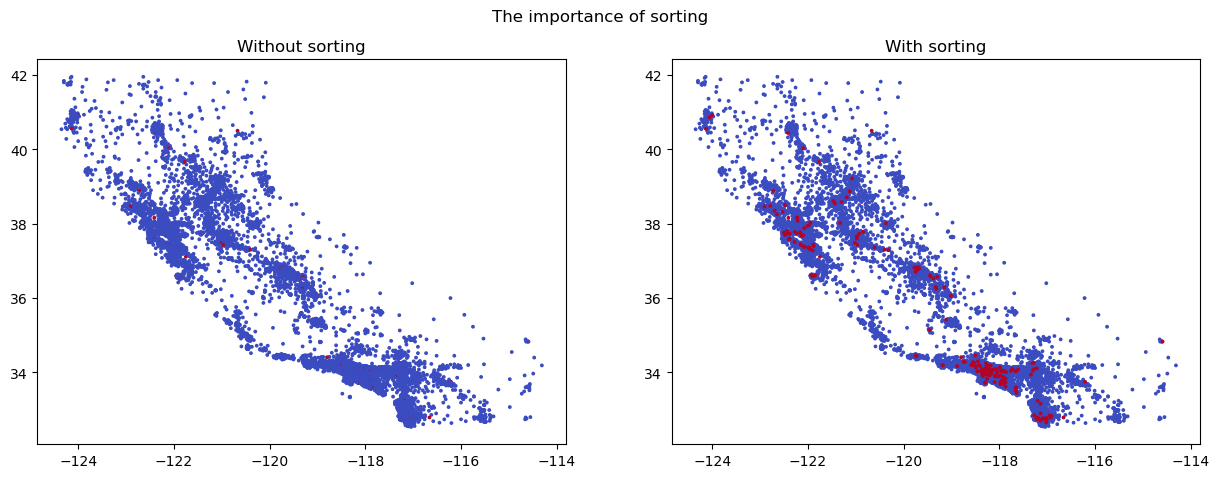

In [27]:
housing_bedrooms = housing_orig.copy()
housing_bedrooms["has_bedrooms"] =  housing_bedrooms["total_bedrooms"].isnull()*1
housing_bedrooms_sorted = housing_bedrooms.sort_values("has_bedrooms")
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
ax1.scatter(housing_bedrooms["longitude"], housing_bedrooms["latitude"], c=housing_bedrooms["has_bedrooms"], s=3, cmap="coolwarm")
ax2.scatter(housing_bedrooms_sorted["longitude"], housing_bedrooms_sorted["latitude"], c=housing_bedrooms_sorted["has_bedrooms"], s=3, cmap="coolwarm")
ax1.set_title("Without sorting")
ax2.set_title("With sorting")
plt.suptitle("The importance of sorting");

## The Plot Algorithm

When I was looking for a correlation between missing **total_bedrooms** and the location, I found that it was hard to see the red dots in the first diagram. The plot algorithm seems to just plot the dots in plain row order, which of course is the most natural way to do it. However, if we have only a small number of dots in a different color, they may be over plotted by other dots. Therefore it can be a good idea to sort the rows in an order that lets the important dots be plotted after the other dots.

About the question: Is it more common in some areas with missing **total_bedrooms**? Well, I don't think I can see any correlation between missing data for **has_bedrooms** and location on the "map". Next step could be to investigate correlations to other variables, like **housing_median_age**, **median_income** and **median_house_value**, but I leave that to someone else to explore.

# Självutvärdering

1. Har något varit utmanande i kunskapskontrollen? Om ja, hur har du hanterat det? 

_Två saker: Vissa veckor har det varit svårare att kombinera arbetsliv och familjeliv med halvtidsstudier! Och det andra: Det tar tid att sitta och pillra och googla med alla detaljer så att ett diagram ser ut som man vill ha det. Det har tyvärr inte gått att hantera på annat sätt än att dra över tiden._

2. Vilket betyg anser du att du ska ha och varför? 

_Jag hoppas att min inlämning räcker till ett G._

3. Något du vill lyfta fram till Antonio? 

_Jag tycker att upplägget med uppgifter har varit bra. Man lär sig inte på riktigt förrän man fått lösa problem själv._